# Task 4: PyTorch Implementation

In [1]:
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

from src.torch_mlp import TorchMLP
from src.torch_train_loop import train_model, load_spiral_npz
from src.visualization import plot_mean_learning_curve, plot_accuracy_comparison

## Modellarchitektur

In [2]:
model = TorchMLP(hidden_dim=5)
print(model)

TorchMLP(
  (fc1): Linear(in_features=2, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=3, bias=True)
  (sigmoid): Sigmoid()
)


## Training mit verschiedenen Batch-Größen

In [10]:
# SGD mit verschiedenen Batch-Größen
losses_sgd_b1, accs_sgd_b1 = train_model(batch_size=1, optimizer_name='sgd', runs=3, epochs=200, lr=0.5)
losses_sgd_b8, accs_sgd_b8 = train_model(batch_size=8, optimizer_name='sgd', runs=3, epochs=200, lr=0.5)

# Adam mit verschiedenen Batch-Größen
losses_adam_b1, accs_adam_b1 = train_model(batch_size=1, optimizer_name='adam', runs=3, epochs=200, lr=0.5)
losses_adam_b8, accs_adam_b8 = train_model(batch_size=8, optimizer_name='adam', runs=3, epochs=200, lr=0.5)

print('SGD:')
print(f'  Batch=1: Final Acc = {np.mean([a[-1] for a in accs_sgd_b1]):.3f} ± {np.std([a[-1] for a in accs_sgd_b1]):.3f}')
print(f'  Batch=8: Final Acc = {np.mean([a[-1] for a in accs_sgd_b8]):.3f} ± {np.std([a[-1] for a in accs_sgd_b8]):.3f}')
print('Adam:')
print(f'  Batch=1: Final Acc = {np.mean([a[-1] for a in accs_adam_b1]):.3f} ± {np.std([a[-1] for a in accs_adam_b1]):.3f}')
print(f'  Batch=8: Final Acc = {np.mean([a[-1] for a in accs_adam_b8]):.3f} ± {np.std([a[-1] for a in accs_adam_b8]):.3f}')

SGD:
  Batch=1: Final Acc = 0.946 ± 0.006
  Batch=8: Final Acc = 0.565 ± 0.018
Adam:
  Batch=1: Final Acc = 0.527 ± 0.116
  Batch=8: Final Acc = 0.838 ± 0.085


## Visualisierung

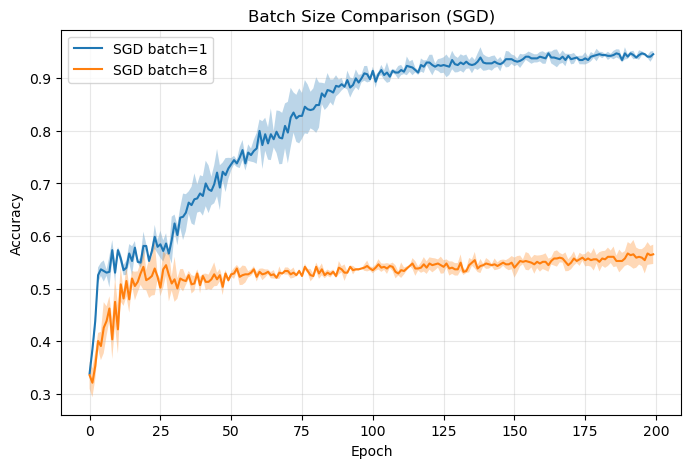

In [11]:
import os
os.makedirs('../results', exist_ok=True)

# Batch-Größen Vergleich (SGD)
plot_accuracy_comparison(accs_sgd_b1, accs_sgd_b8, 'SGD batch=1', 'SGD batch=8', '../results/task4_batch_size_comparison.pdf')

acc1 = np.array(accs_sgd_b1)
acc8 = np.array(accs_sgd_b8)
epochs = np.arange(len(acc1[0]))

plt.figure(figsize=(8, 5))
plt.plot(epochs, acc1.mean(axis=0), label='SGD batch=1')
plt.fill_between(epochs, acc1.mean(0)-acc1.std(0), acc1.mean(0)+acc1.std(0), alpha=0.3)
plt.plot(epochs, acc8.mean(axis=0), label='SGD batch=8')
plt.fill_between(epochs, acc8.mean(0)-acc8.std(0), acc8.mean(0)+acc8.std(0), alpha=0.3)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Batch Size Comparison (SGD)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## Visualisierung: Optimizer Vergleich

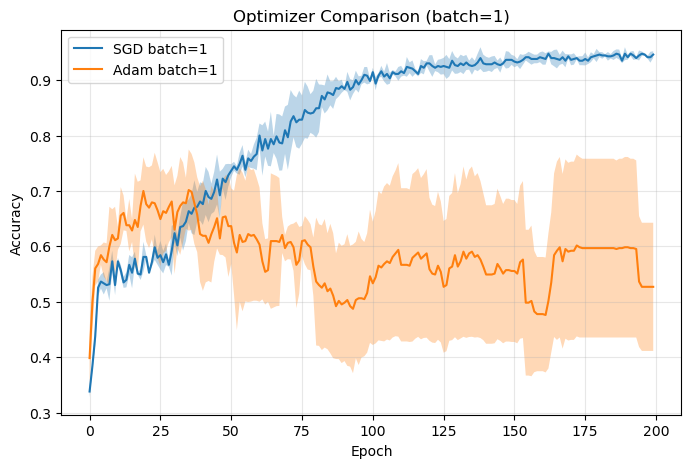

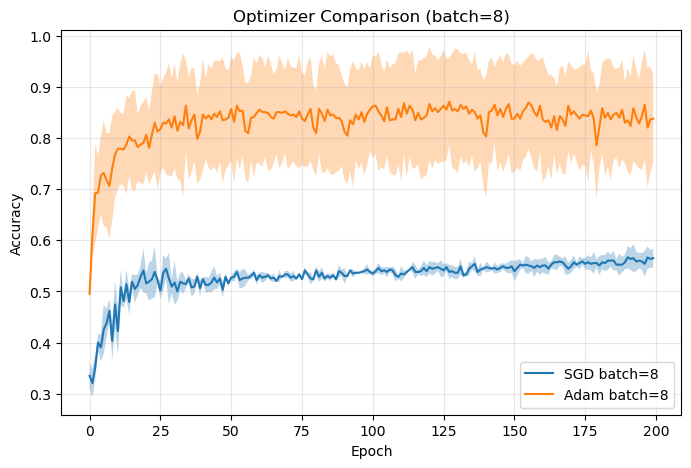

In [12]:
# Optimizer Vergleich (batch=1)
plot_accuracy_comparison(accs_sgd_b1, accs_adam_b1, 'SGD batch=1', 'Adam batch=1', '../results/task4_optimizer_comparison_b1.pdf')

acc_sgd = np.array(accs_sgd_b1)
acc_adam = np.array(accs_adam_b1)
epochs = np.arange(len(acc_sgd[0]))

plt.figure(figsize=(8, 5))
plt.plot(epochs, acc_sgd.mean(axis=0), label='SGD batch=1')
plt.fill_between(epochs, acc_sgd.mean(0)-acc_sgd.std(0), acc_sgd.mean(0)+acc_sgd.std(0), alpha=0.3)
plt.plot(epochs, acc_adam.mean(axis=0), label='Adam batch=1')
plt.fill_between(epochs, acc_adam.mean(0)-acc_adam.std(0), acc_adam.mean(0)+acc_adam.std(0), alpha=0.3)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Optimizer Comparison (batch=1)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Optimizer Vergleich (batch=8)
plot_accuracy_comparison(accs_sgd_b8, accs_adam_b8, 'SGD batch=8', 'Adam batch=8', '../results/task4_optimizer_comparison_b8.pdf')

acc_sgd = np.array(accs_sgd_b8)
acc_adam = np.array(accs_adam_b8)

plt.figure(figsize=(8, 5))
plt.plot(epochs, acc_sgd.mean(axis=0), label='SGD batch=8')
plt.fill_between(epochs, acc_sgd.mean(0)-acc_sgd.std(0), acc_sgd.mean(0)+acc_sgd.std(0), alpha=0.3)
plt.plot(epochs, acc_adam.mean(axis=0), label='Adam batch=8')
plt.fill_between(epochs, acc_adam.mean(0)-acc_adam.std(0), acc_adam.mean(0)+acc_adam.std(0), alpha=0.3)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Optimizer Comparison (batch=8)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## Einzelne Lernkurven

In [13]:
# Einzelne Lernkurven mit Mean ± Std
plot_mean_learning_curve(losses_sgd_b1, accs_sgd_b1, 'SGD batch=1', '../results/task4_sgd_b1_learning_curve.pdf')
plot_mean_learning_curve(losses_sgd_b8, accs_sgd_b8, 'SGD batch=8', '../results/task4_sgd_b8_learning_curve.pdf')
plot_mean_learning_curve(losses_adam_b1, accs_adam_b1, 'Adam batch=1', '../results/task4_adam_b1_learning_curve.pdf')
plot_mean_learning_curve(losses_adam_b8, accs_adam_b8, 'Adam batch=8', '../results/task4_adam_b8_learning_curve.pdf')

'../results/task4_adam_b8_learning_curve.pdf'

## Beobachtungen

- **Batch-Größen**: Kleinere Batch-Größen führen zu mehr Rauschen aber schnellerer Konvergenz. Größere Batch-Größen geben stabilere Updates aber langsamere Konvergenz.
- **Optimizer**: Adam konvergiert typischerweise schneller als SGD, benötigt aber mehr Speicher.
- **PyTorch**: Automatisiert Backpropagation via Autograd - keine manuelle Gradientenberechnung nötig.
- **Variabilität**: Mehrere Durchläufe zeigen die Variabilität durch unterschiedliche Gewichtsinitialisierungen.